# Orange brix Analysis

## Import libraries

In [245]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [246]:
plt.style.use("fivethirtyeight")

## Create main variables

In [247]:
class Dataset(object):
    def __init__(
        self, dataframe: pd.DataFrame, categorical_cols: list, numeric_cols: list
    ):
        self.dataframe = dataframe
        self.categorical_cols = categorical_cols
        self.numeric_cols = numeric_cols
    
    def get_dataframe(self):
        return self.dataframe

In [248]:
list_dataset: dict[str, Dataset] = dict()
list_model: dict = dict()

## Create functions

In [249]:
def list_all_dataset_names():
    return list_dataset.keys()

In [250]:
def list_all_model_names():
    return list_model.keys()

In [251]:
def plot_along_dataset(
    dataset: Dataset,
    nrow_subplot: int,
    ncol_subplot: int,
    figsize: tuple[int, int],
):
    numeric_df = dataset.get_dataframe()[dataset.numeric_cols]
    x = np.arange(len(numeric_df))
    figs, axes = plt.subplots(nrow_subplot, ncol_subplot, figsize=figsize)
    for i in range(nrow_subplot):
        for j in range(ncol_subplot):
            ax = axes[i][j]
            index = i * ncol_subplot + j
            ax.plot(x, numeric_df.iloc[:, index])
            ax.set_title(f"{numeric_df.columns[index]} along dataframe", size=15)
            ax.xaxis.set_tick_params(labelsize=12)
            ax.xaxis.set_ticks(np.arange(0, len(numeric_df), 10))
            ax.yaxis.set_tick_params(labelsize=12)

In [277]:
def plot_hist_kde_box_all_columns(dataset: Dataset):

    number_of_numeric_col = len(dataset.numeric_cols)
    figs, axes = plt.subplots(
        number_of_numeric_col, 3, figsize=(30, number_of_numeric_col * 10)
    )

    numeric_dataframe = dataset.get_dataframe()[dataset.numeric_cols]

    for i in range(number_of_numeric_col):
        axes[i][0].set_title(f"{numeric_dataframe.columns[i]} histogram", size=20)
        axes[i][0].yaxis.set_tick_params(labelsize=15)
        axes[i][0].xaxis.set_tick_params(labelsize=15)
        sns.histplot(ax=axes[i][0], data=numeric_dataframe.iloc[:, i])

        axes[i][1].set_title(f"{numeric_dataframe.columns[i]} KDE", size=20)
        axes[i][1].xaxis.set_tick_params(labelsize=15)
        axes[i][1].yaxis.set_tick_params(labelsize=15)
        sns.kdeplot(ax=axes[i][1], data=numeric_dataframe.iloc[:, i])

        axes[i][2].set_title(f"{numeric_dataframe.columns[i]} Boxplot", size=20)
        axes[i][2].xaxis.set_tick_params(labelsize=15)
        axes[i][2].yaxis.set_tick_params(labelsize=15)
        sns.boxplot(ax=axes[i][2], data=numeric_dataframe.iloc[:, i])

In [327]:
def plot_all_columns_group_by_a_categorical_col(
    dataset: Dataset, categorical_col: str
) -> list[pd.DataFrame]:

    dataframe = dataset.get_dataframe()
    numeric_dataframe = dataframe[dataset.numeric_cols]
    number_of_numeric_col = len(dataset.numeric_cols)
    figs, axes = plt.subplots(
        number_of_numeric_col, 2, figsize=(20, number_of_numeric_col * 10)
    )
    groups = dataframe[categorical_col].unique()

    for i in range(number_of_numeric_col):
        axes[i][0].set_title(f"{numeric_dataframe.columns[i]} KDE", size=20)
        axes[i][0].xaxis.set_tick_params(labelsize=15)
        axes[i][0].yaxis.set_tick_params(labelsize=15)
        for group in groups:
            sns.kdeplot(
                ax=axes[i][0],
                data=numeric_dataframe[dataframe[categorical_col] == group].iloc[:, i],
                label=f"Type {group}",
            )
        axes[i][0].legend()

        axes[i][1].set_title(f"{numeric_dataframe.columns[i]} Boxplot", size=20)
        axes[i][1].xaxis.set_tick_params(labelsize=15)
        axes[i][1].yaxis.set_tick_params(labelsize=15)
        sns.boxplot(
            ax=axes[i][1],
            hue="type",
            y=numeric_dataframe.columns[i],
            data=dataframe,
        )

    result = []
    for group in groups:
        result.append(dataframe[dataframe[categorical_col] == group])
    
    return result

In [306]:
dataframe = list_dataset["std_col_name"].get_dataframe()
numeric_dataframe = dataframe[list_dataset["std_col_name"].numeric_cols]
dataframe["type"] == "A"

0      True
1      True
2      True
3      True
4      True
      ...  
76    False
77    False
78    False
79    False
80    False
Name: type, Length: 81, dtype: bool

## Import data

In [253]:
raw_df = pd.read_excel("orange_data.xlsx", sheet_name=0)

In [254]:
raw_df.head(10)

,Name,p,C NaOH,Khối lượng(g),Đường kính ngang(mm),Đường kính dọc(mm),Độ đường (Brix %),TA (%),Brix:TA,BrmTA
0,A1,1.90,0.4000,255,257,262,10.9,4.867141,2.239508,6.032859
1,A2,1.20,0.4000,325,288,278,9.8,3.073984,3.188045,6.726016
2,A3,2.30,0.4000,185,235,237,11.0,5.891803,1.867001,5.108197
3,A4,1.40,0.4128,203,245,245,9.0,3.701077,2.431725,5.298923
4,A5,1.20,0.4000,229,253,249,10.9,3.073984,3.545887,7.826016
5,A7,1.30,0.4128,357,305,290,10.7,3.436714,3.113439,7.263286
6,A8,2.00,0.4000,309,275,285,11.2,5.123307,2.186088,6.076693
7,A9,1.90,0.4128,321,285,280,9.2,5.022890,1.831615,4.177110
8,A10,1.45,0.4082,245,255,259,9.5,3.790542,2.506238,5.709458
9,A11,2.00,0.4128,275,267,270,10.5,5.287252,1.985909,5.212748


In [255]:
raw_df.columns

Index(['Name', 'p', 'C NaOH', 'Khối lượng(g)', 'Đường kính ngang(mm)',
       'Đường kính dọc(mm)', 'Độ đường (Brix %)', 'TA (%)', 'Brix:TA',
       'BrmTA'],
      dtype='object')

In [256]:
raw_df.shape

(81, 10)

In [257]:
new_column_names = {
    "Name": "name",
    "p": "v_naoh",
    "C NaOH": "c_naoh",
    "Khối lượng(g)": "mass",
    "Đường kính ngang(mm)": "h_diameter",
    "Đường kính dọc(mm)": "v_diameter",
    "Độ đường (Brix %)": "brix",
    "TA (%)": "ta",
    "Brix:TA": "brix_ta",
    "BrmTA": "brm_ta",
}

std_col_name_df = raw_df.rename(columns=new_column_names)

In [258]:
std_col_name_df.head(10)

,name,v_naoh,c_naoh,mass,h_diameter,v_diameter,brix,ta,brix_ta,brm_ta
0,A1,1.90,0.4000,255,257,262,10.9,4.867141,2.239508,6.032859
1,A2,1.20,0.4000,325,288,278,9.8,3.073984,3.188045,6.726016
2,A3,2.30,0.4000,185,235,237,11.0,5.891803,1.867001,5.108197
3,A4,1.40,0.4128,203,245,245,9.0,3.701077,2.431725,5.298923
4,A5,1.20,0.4000,229,253,249,10.9,3.073984,3.545887,7.826016
5,A7,1.30,0.4128,357,305,290,10.7,3.436714,3.113439,7.263286
6,A8,2.00,0.4000,309,275,285,11.2,5.123307,2.186088,6.076693
7,A9,1.90,0.4128,321,285,280,9.2,5.022890,1.831615,4.177110
8,A10,1.45,0.4082,245,255,259,9.5,3.790542,2.506238,5.709458
9,A11,2.00,0.4128,275,267,270,10.5,5.287252,1.985909,5.212748


In [259]:
categorical_cols = ["name"]
std_col_name_dataset = Dataset(
    std_col_name_df,
    categorical_cols=categorical_cols,
    numeric_cols=[col for col in std_col_name_df.columns if col not in categorical_cols],
)

In [260]:
print(std_col_name_dataset.categorical_cols)
print(std_col_name_dataset.numeric_cols)
std_col_name_dataset.dataframe

['name']
['v_naoh', 'c_naoh', 'mass', 'h_diameter', 'v_diameter', 'brix', 'ta', 'brix_ta', 'brm_ta']


,name,v_naoh,c_naoh,mass,h_diameter,v_diameter,brix,ta,brix_ta,brm_ta
0,A1,1.90,0.4000,255,257,262,10.9,4.867141,2.239508,6.032859
1,A2,1.20,0.4000,325,288,278,9.8,3.073984,3.188045,6.726016
2,A3,2.30,0.4000,185,235,237,11.0,5.891803,1.867001,5.108197
3,A4,1.40,0.4128,203,245,245,9.0,3.701077,2.431725,5.298923
4,A5,1.20,0.4000,229,253,249,10.9,3.073984,3.545887,7.826016
...,...,...,...,...,...,...,...,...,...,...
76,C24,1.60,0.4016,177,225,216,12.5,4.115040,3.037638,8.384960
77,C25,1.60,0.4016,173,216,220,11.1,4.115040,2.697422,6.984960
78,C26,0.95,0.4016,126,195,197,12.8,2.443305,5.238806,10.356695
79,C28,1.70,0.4016,181,216,232,11.8,4.372230,2.698852,7.427770


In [261]:
list_dataset["std_col_name"] = std_col_name_dataset

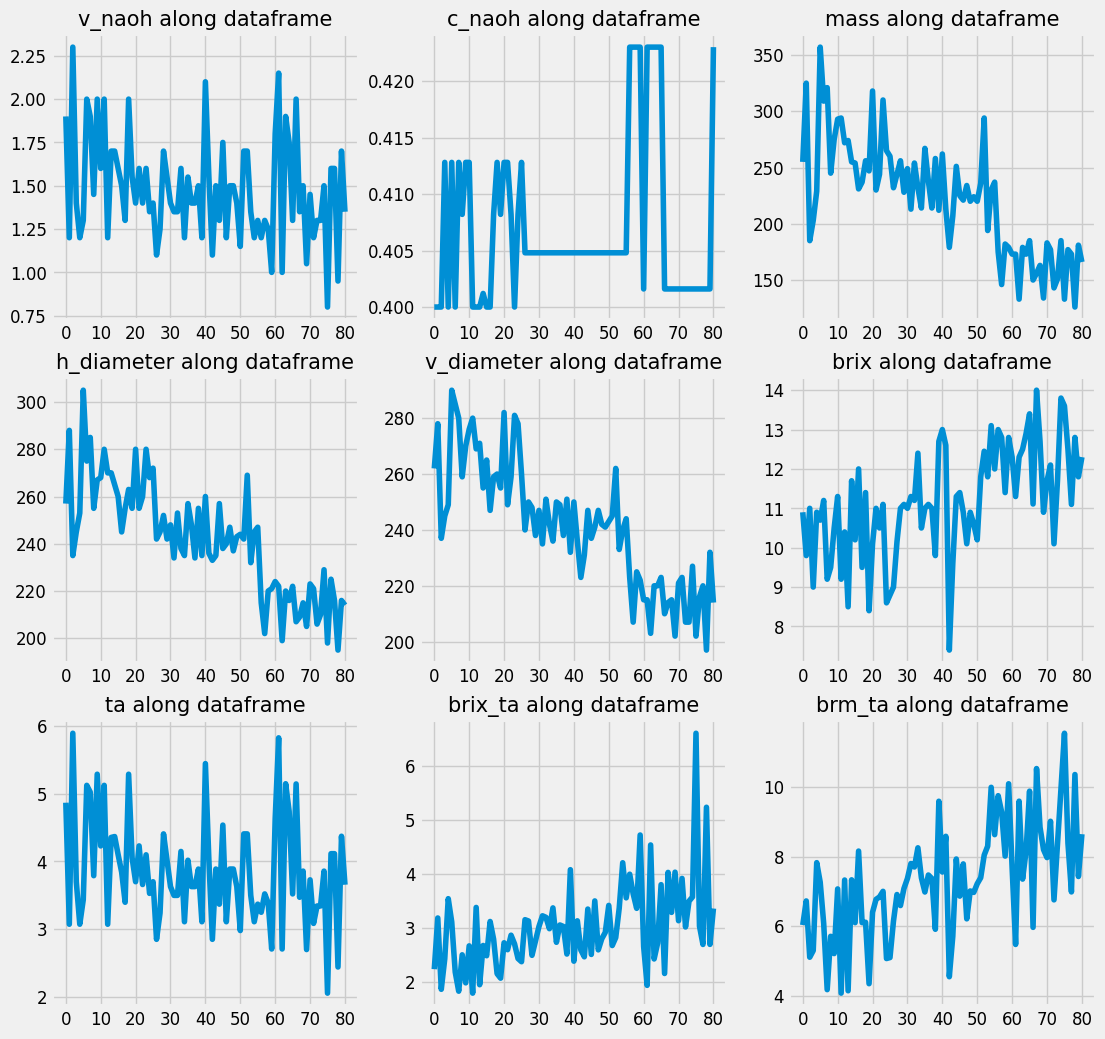

In [262]:
plot_along_dataset(list_dataset["std_col_name"], 3, 3, (12, 12))

#### From the shape of lines in graph "mass", "h_diameter", "v_diameter" and "brix", we can see the lines could be divided into 3 levels along dataset. We assume that there are 3 types of data in the dataset. We could double check the name / label of dataset.

In [263]:
list_dataset["std_col_name"].get_dataframe().columns

Index(['name', 'v_naoh', 'c_naoh', 'mass', 'h_diameter', 'v_diameter', 'brix',
       'ta', 'brix_ta', 'brm_ta'],
      dtype='object')

In [264]:
print(list_dataset["std_col_name"].get_dataframe()["name"].to_list())

['A1', 'A2', 'A3', 'A4', 'A5', 'A7', 'A8', 'A9', 'A10', 'A11', 'A13', 'A14', 'A15', 'A16', 'A17', 'A18', 'A19', 'A20', 'A21', 'A24', 'A25', 'A26', 'A27', 'A28', 'A29', 'A30', 'B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'B9', 'B10', 'B11', 'B12', 'B13', 'B14', 'B15', 'B16', 'B17', 'B18', 'B19', 'B20', 'B21', 'B22', 'B23', 'B24', 'B25', 'B26', 'B27', 'B28', 'B29', 'B30', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C8', 'C9', 'C10', 'C11', 'C12', 'C14', 'C15', 'C16', 'C17', 'C19', 'C20', 'C21', 'C22', 'C23', 'C24', 'C25', 'C26', 'C28', 'C29']


We count the number of type to see whether the amount is equivalent to the shape of lines in the following graphs: "mass", "h_diameter", "v_diameter" and "brix"

In [265]:
import re

data_type = []
for name in list_dataset["std_col_name"].get_dataframe()["name"].str.upper():
    data_type.append(re.findall("[A-Z]", name)[0])

data_type = pd.DataFrame(data_type, columns=["type"])
data_type["count"] = 1
data_type.groupby(["type"]).count()["count"]

type
A    26
B    30
C    25
Name: count, dtype: int64

In [267]:
list_dataset["std_col_name"].dataframe["type"] = data_type["type"]

In [268]:
list_dataset["std_col_name"].get_dataframe().head(10)

,name,v_naoh,c_naoh,mass,h_diameter,v_diameter,brix,ta,brix_ta,brm_ta,type
0,A1,1.90,0.4000,255,257,262,10.9,4.867141,2.239508,6.032859,A
1,A2,1.20,0.4000,325,288,278,9.8,3.073984,3.188045,6.726016,A
2,A3,2.30,0.4000,185,235,237,11.0,5.891803,1.867001,5.108197,A
3,A4,1.40,0.4128,203,245,245,9.0,3.701077,2.431725,5.298923,A
4,A5,1.20,0.4000,229,253,249,10.9,3.073984,3.545887,7.826016,A
5,A7,1.30,0.4128,357,305,290,10.7,3.436714,3.113439,7.263286,A
6,A8,2.00,0.4000,309,275,285,11.2,5.123307,2.186088,6.076693,A
7,A9,1.90,0.4128,321,285,280,9.2,5.022890,1.831615,4.177110,A
8,A10,1.45,0.4082,245,255,259,9.5,3.790542,2.506238,5.709458,A
9,A11,2.00,0.4128,275,267,270,10.5,5.287252,1.985909,5.212748,A


## Analyze quantitative data

### Plots for all rows

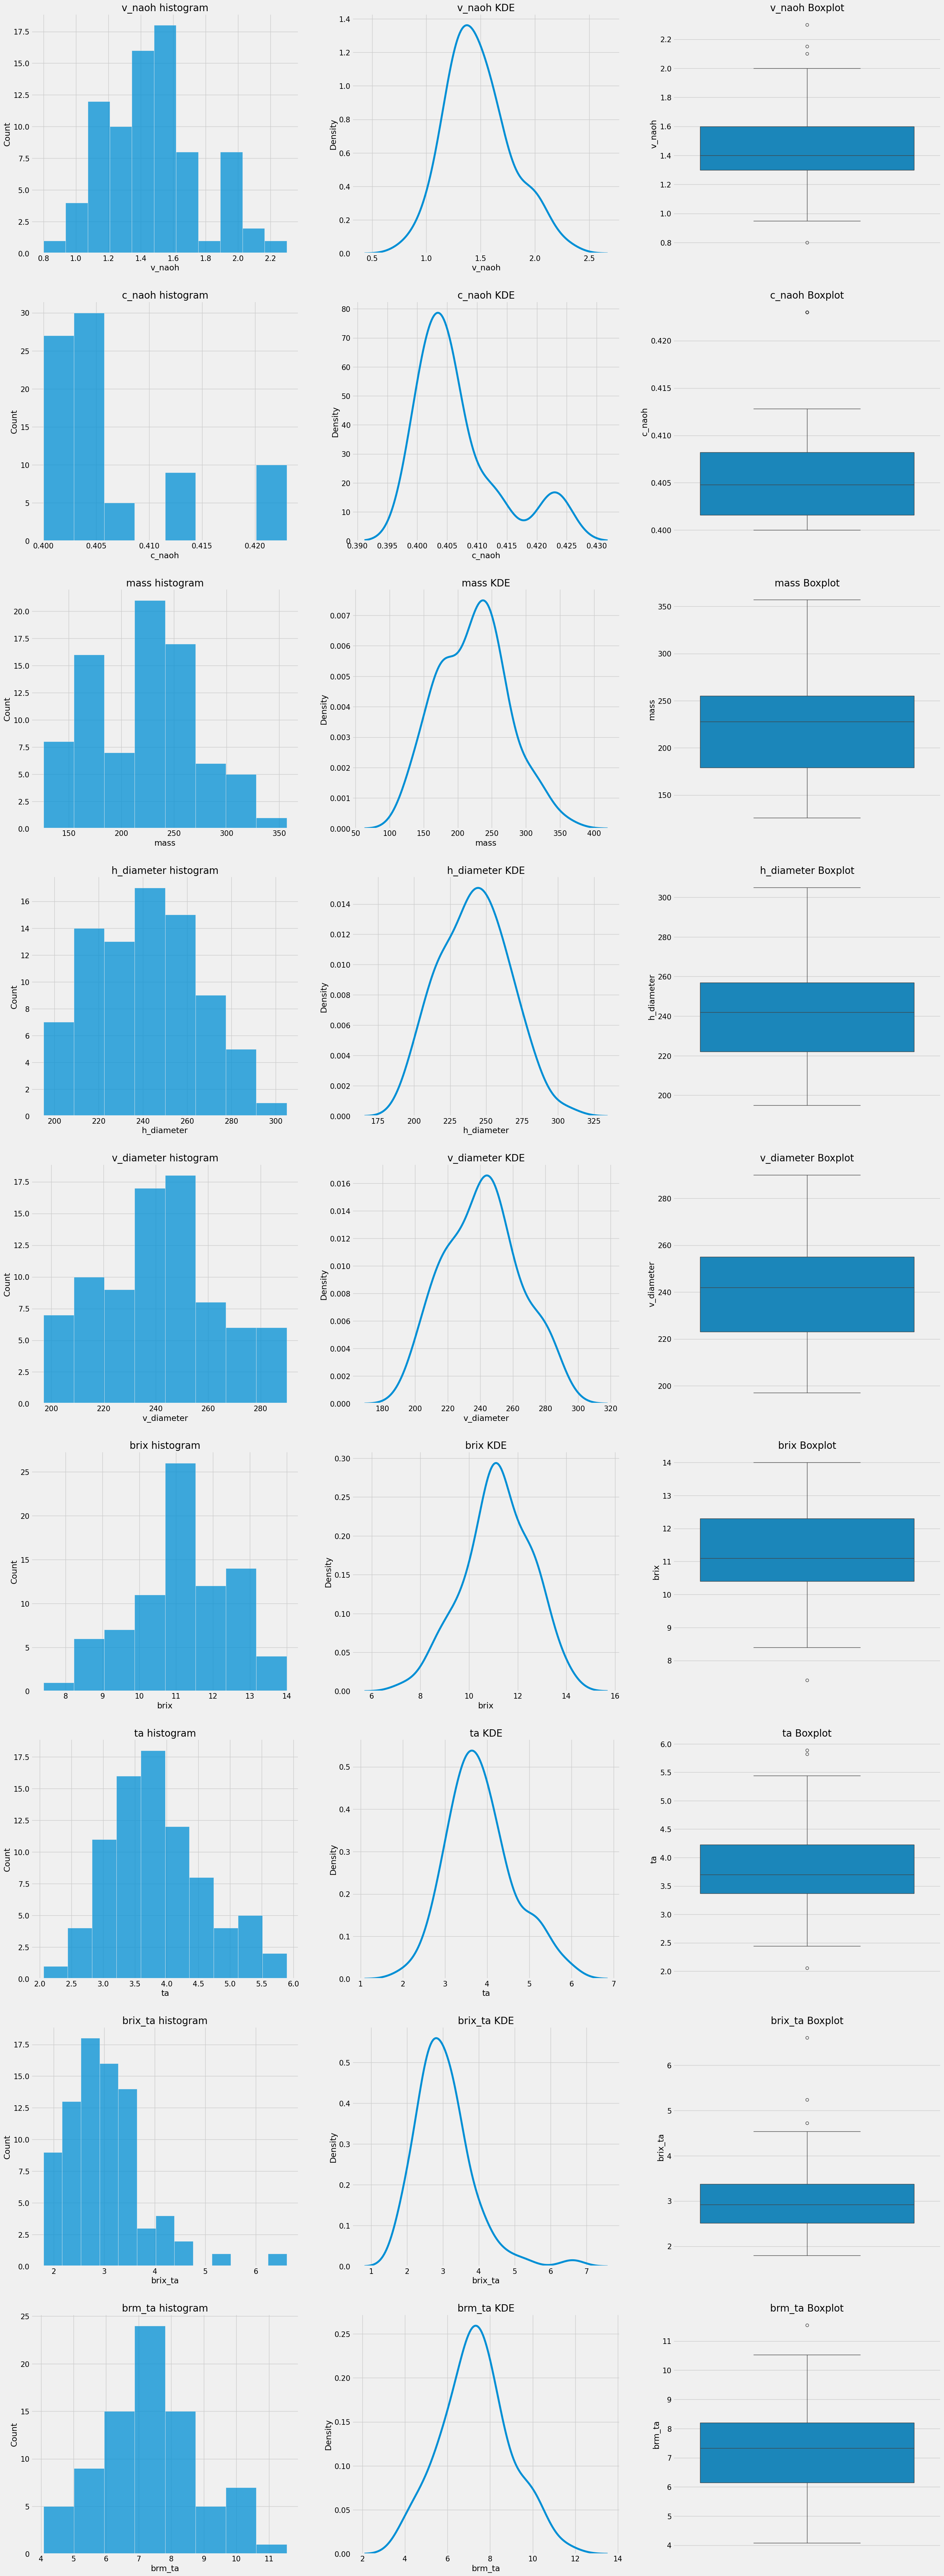

In [274]:
plot_hist_kde_box_all_columns(list_dataset["std_col_name"])

In [275]:
list_dataset["std_col_name"].get_dataframe().describe()

,v_naoh,c_naoh,mass,h_diameter,v_diameter,brix,ta,brix_ta,brm_ta
count,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000
mean,1.477778,0.406857,222.197531,241.777778,241.358025,11.169259,3.849815,3.024935,7.319445
std,0.297069,0.007092,50.582215,23.652167,22.587225,1.362702,0.774895,0.786520,1.587514
min,0.800000,0.400000,126.000000,195.000000,197.000000,7.400000,2.057520,1.795715,4.076693
25%,1.300000,0.401600,179.000000,222.000000,223.000000,10.400000,3.370111,2.512846,6.148368
50%,1.400000,0.404800,228.000000,242.000000,242.000000,11.100000,3.701077,2.920633,7.332125
75%,1.600000,0.408200,255.000000,257.000000,255.000000,12.300000,4.229802,3.371688,8.199505
max,2.300000,0.423000,357.000000,305.000000,290.000000,14.000000,5.891803,6.609899,11.542480


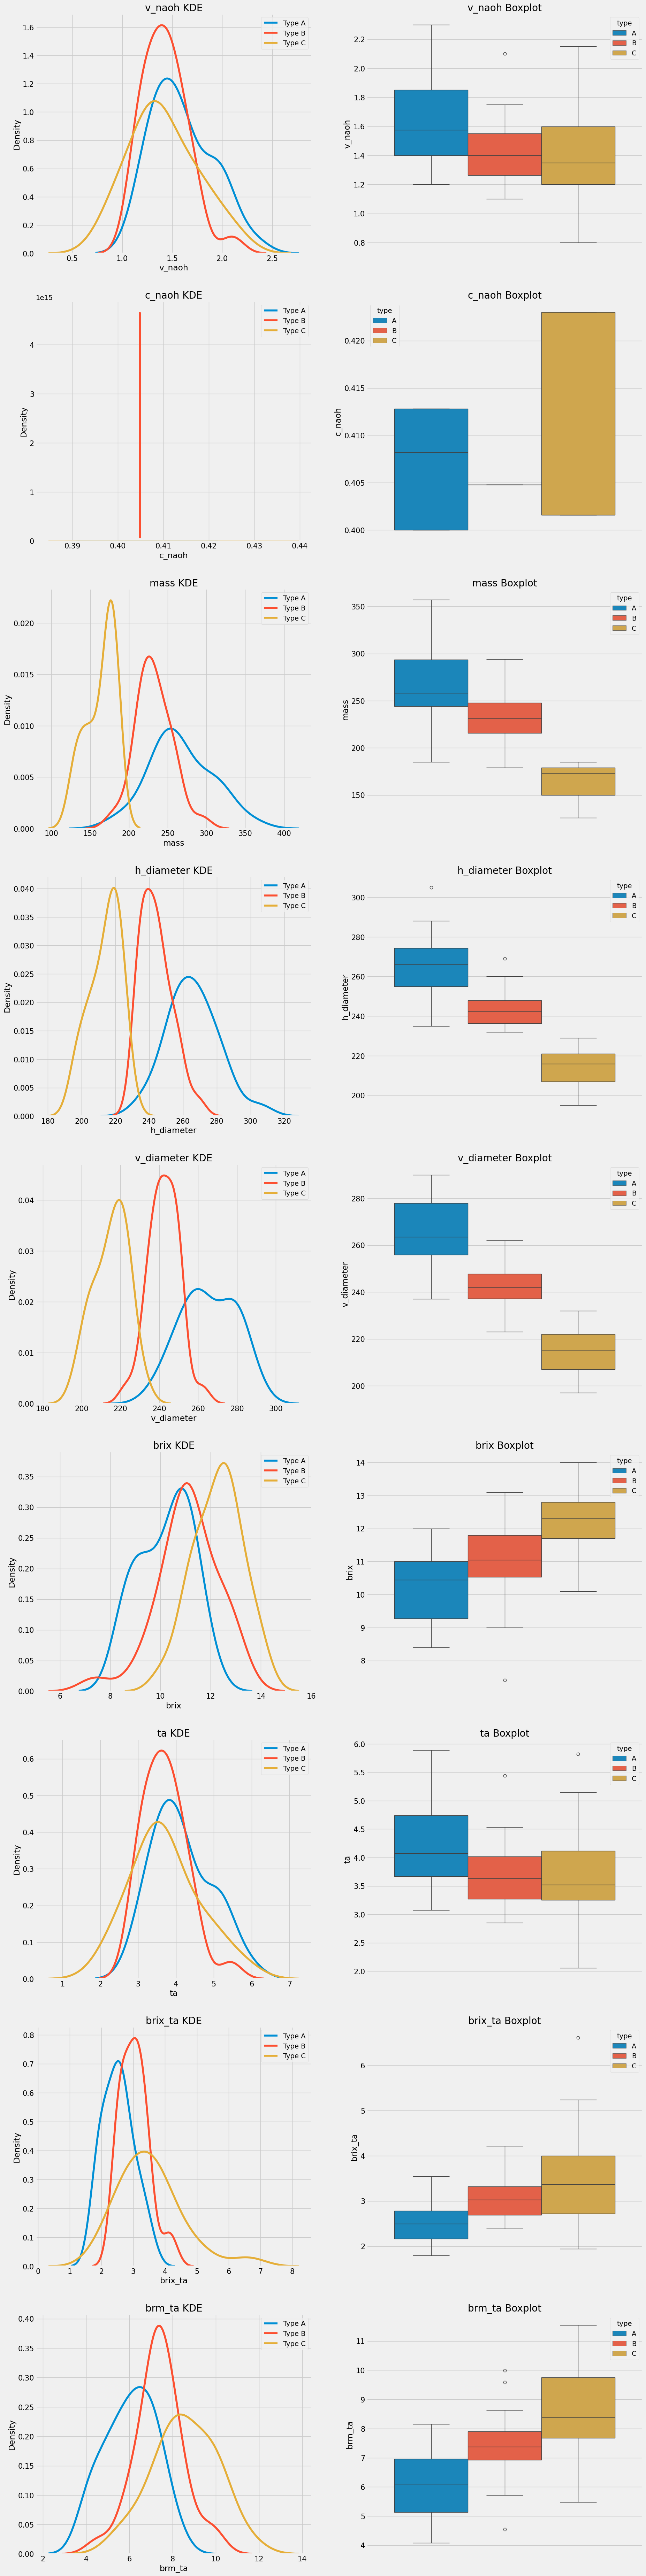

In [331]:
plot_all_columns_group_by_a_categorical_col(list_dataset["std_col_name"], "type")

In [326]:
for df in group_by_dataframes:
    print()
    display(df.describe())

,v_naoh,c_naoh,mass,h_diameter,v_diameter,brix,ta,brix_ta,brm_ta
count,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000
mean,1.598077,0.406054,267.076923,265.807692,265.423077,10.207692,4.154492,2.528228,6.053200
std,0.299827,0.005863,40.004923,15.192154,14.054673,1.056758,0.772248,0.484999,1.167486
min,1.200000,0.400000,185.000000,235.000000,237.000000,8.400000,3.073984,1.795715,4.076693
25%,1.400000,0.400000,244.250000,255.000000,256.000000,9.275000,3.670145,2.163619,5.134335
50%,1.575000,0.408200,258.000000,266.000000,263.500000,10.450000,4.075302,2.497432,6.101469
75%,1.850000,0.412800,293.750000,274.250000,278.000000,11.000000,4.742325,2.778798,6.961057
max,2.300000,0.412800,357.000000,305.000000,290.000000,12.000000,5.891803,3.545887,8.157520


,v_naoh,c_naoh,mass,h_diameter,v_diameter,brix,ta,brix_ta,brm_ta
count,30.000000,3.000000e+01,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,1.428333,4.048000e-01,231.933333,244.100000,242.300000,11.080000,3.702802,3.038213,7.377198
std,0.224255,5.646013e-17,23.319273,9.207755,7.826348,1.222956,0.581357,0.451497,1.099468
min,1.100000,4.048000e-01,179.000000,232.000000,223.000000,7.400000,2.851632,2.387939,4.548368
25%,1.262500,4.048000e-01,215.500000,236.250000,237.250000,10.525000,3.272896,2.692522,6.924794
50%,1.400000,4.048000e-01,231.000000,242.500000,242.000000,11.050000,3.629350,3.030845,7.379889
75%,1.550000,4.048000e-01,247.750000,248.000000,247.750000,11.800000,4.018209,3.321959,7.897484
max,2.100000,4.048000e-01,294.000000,269.000000,262.000000,13.100000,5.444026,4.211038,9.989128


,v_naoh,c_naoh,mass,h_diameter,v_diameter,brix,ta,brix_ta,brm_ta
count,25.000000,25.00000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000
mean,1.412000,0.41016,163.840000,214.000000,215.200000,12.276400,3.709366,3.525576,8.567034
std,0.341345,0.01070,18.878294,9.264628,8.920949,0.964844,0.907641,1.020844,1.468910
min,0.800000,0.40160,126.000000,195.000000,197.000000,10.100000,2.057520,1.940168,5.475761
25%,1.200000,0.40160,150.000000,207.000000,207.000000,11.700000,3.250738,2.721140,7.670580
50%,1.350000,0.40160,173.000000,216.000000,215.000000,12.300000,3.521633,3.366620,8.384960
75%,1.600000,0.42300,179.000000,221.000000,222.000000,12.800000,4.115040,3.999092,9.749262
max,2.150000,0.42300,185.000000,229.000000,232.000000,14.000000,5.824239,6.609899,11.542480


#### From above plots, we see that "mass", "h_diameter", "v_diameter" and "brm_ta" plots have clearly patterns corresponding with types.

## Analyze qualitative data

### Use Welch's t-test to see whether the data could be divided into 3 parts A, B, and C.

In [ ]:
data_set_type_a.shape

(26, 11)

In [ ]:
data_set_type_b.shape

(30, 11)

In [ ]:
data_set_type_c.shape

(25, 11)

In [ ]:
columns_to_compare = ["mass", "h_diameter", "v_diameter", "brm_ta"]

In [ ]:
t_statistic_a_b, p_value_a_b = stats.ttest_ind(
    data_set_type_a[columns_to_compare],
    data_set_type_b[columns_to_compare],
    equal_var=False,
)
p_value_a_b

array([3.30612997e-04, 1.55132913e-07, 6.26142202e-09, 6.44503160e-05])

In [ ]:
t_statistic_b_c, p_value_b_c = stats.ttest_ind(
    data_set_type_b[columns_to_compare],
    data_set_type_c[columns_to_compare],
    equal_var=False,
)
p_value_b_c

array([1.10944798e-16, 1.58026236e-16, 6.70518348e-16, 1.70113624e-03])

In [ ]:
t_statistic_a_c, p_value_a_c = stats.ttest_ind(
    data_set_type_a[columns_to_compare],
    data_set_type_c[columns_to_compare],
    equal_var=False,
)
p_value_a_c

array([5.63335241e-14, 3.84681830e-18, 6.68619135e-19, 2.21512713e-08])

### All p-values smaller than $ \alpha $ = 0.05
### => Conclusion from Welch's t-test: The dataset could be divided into 3 parts A, B and C

## Matrix plots

### Pairplots

<Figure size 1600x1600 with 0 Axes>

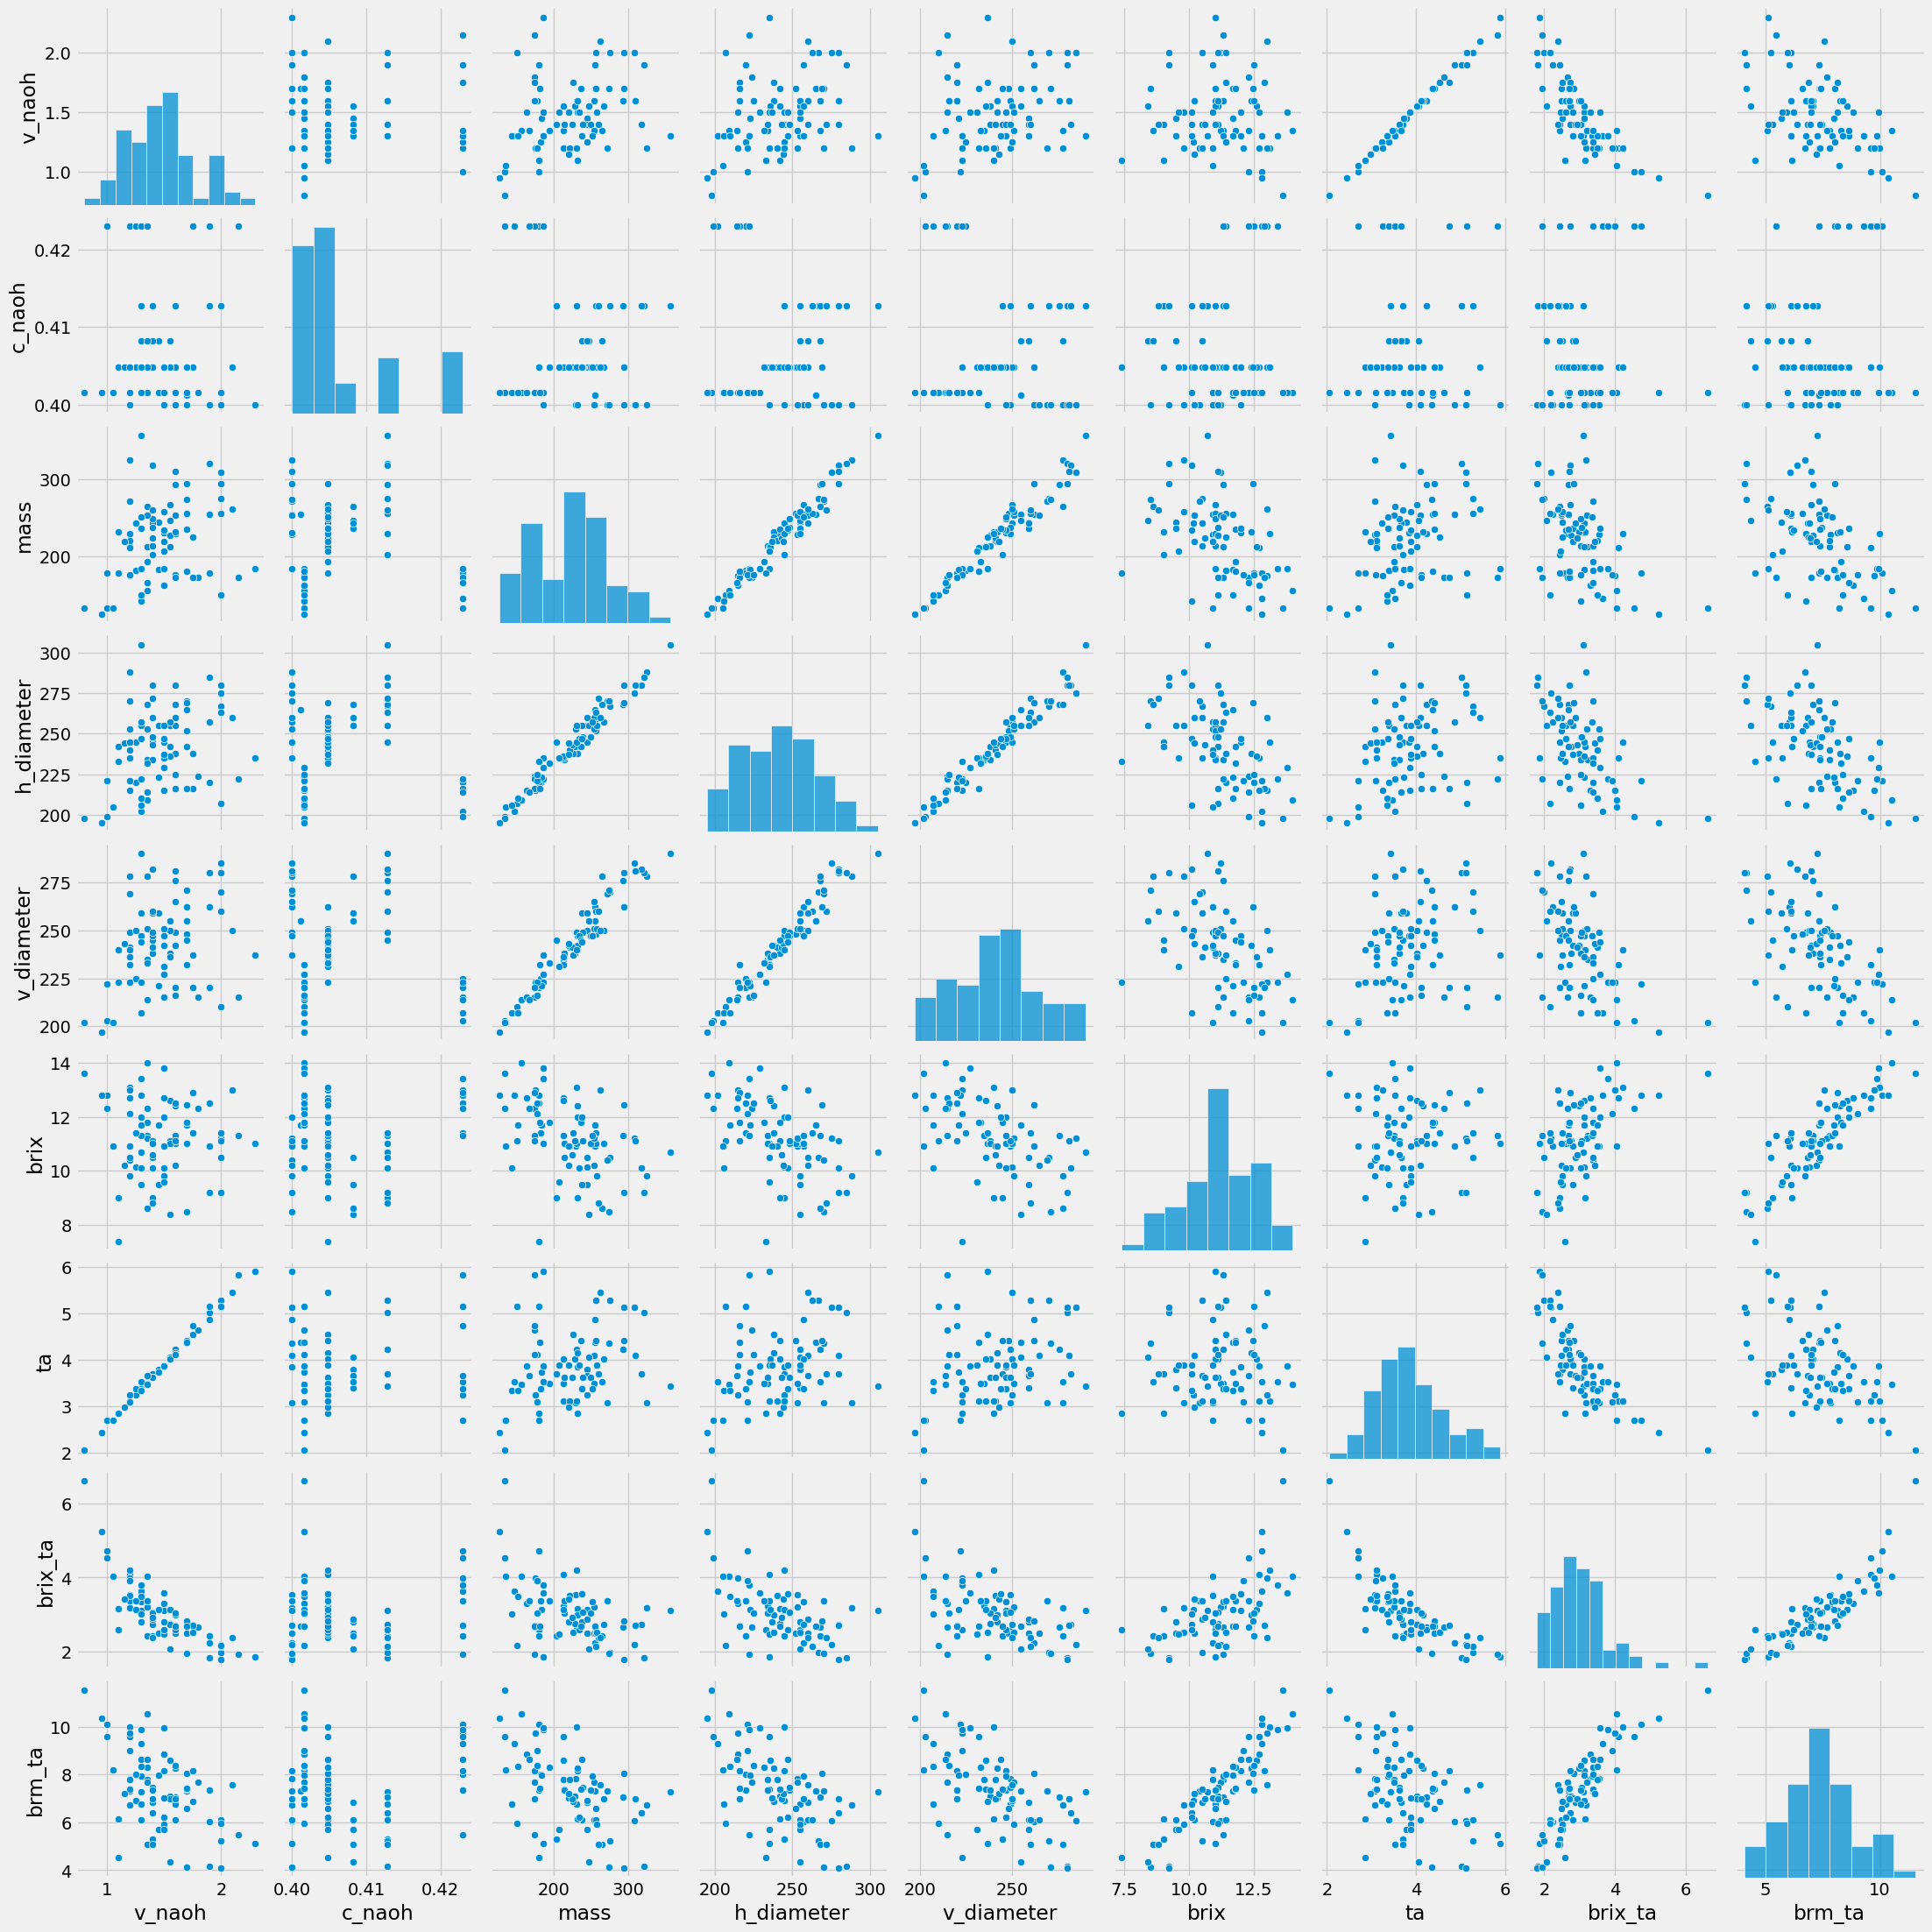

In [ ]:
plt.figure(figsize=(16, 16))
sns.pairplot(dataset)

#### Some potential features to explain brix are "mass", "h_diameter", "v_diameter", "brix_ta", "brm_ta".

### Heatmap

<Axes: >

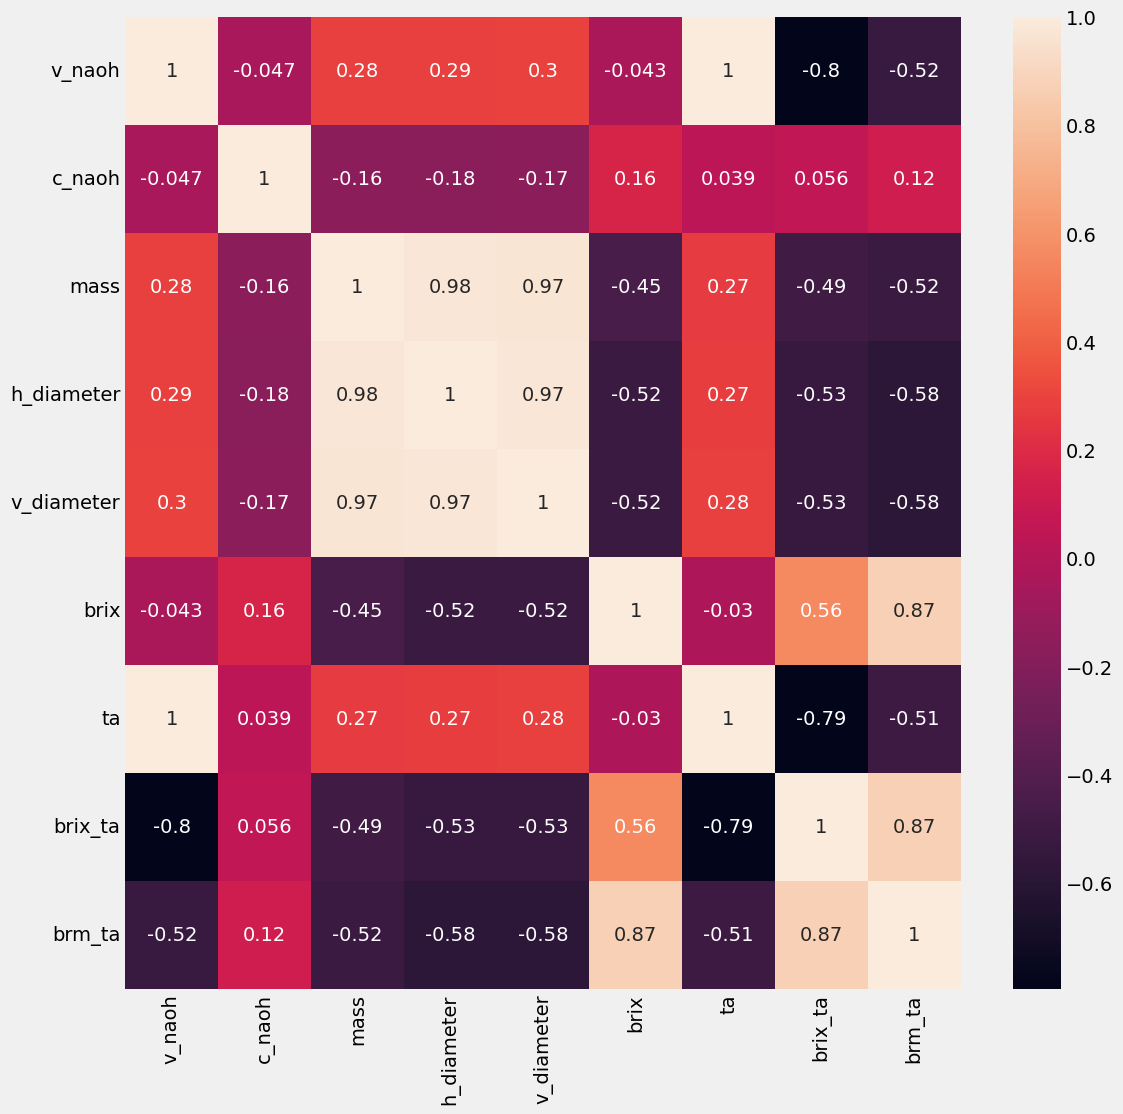

In [ ]:
plt.figure(figsize=(12, 12))
dataset_corr = dataset.iloc[:, 1:10].corr()
sns.heatmap(dataset_corr, annot=True)

#### => Some features that could be used for model: **mass, h_diameter, v_diameter, brix_ta, brm_ta** (quantitative) and **type** (qualitative) to explain **brix**. However, **brix_ta** and **brm_ta** are directly related to **brix**, then they will not be considered.

## Build Models

### Find patterns for models

In [ ]:
model_dataset = dataset[["mass", "h_diameter", "v_diameter", "type", "brix"]]
dummies_df = pd.get_dummies(dataset["type"])
model_dataset = pd.concat([model_dataset, dummies_df], axis=1)
model_dataset

,mass,h_diameter,v_diameter,type,brix,A,B,C
0,255,257,262,A,10.9,True,False,False
1,325,288,278,A,9.8,True,False,False
2,185,235,237,A,11.0,True,False,False
3,203,245,245,A,9.0,True,False,False
4,229,253,249,A,10.9,True,False,False
...,...,...,...,...,...,...,...,...
76,177,225,216,C,12.5,False,False,True
77,173,216,220,C,11.1,False,False,True
78,126,195,197,C,12.8,False,False,True
79,181,216,232,C,11.8,False,False,True


In [ ]:
y_variable = dataset["brix"]
y_variable.head(10)

0    10.9
1     9.8
2    11.0
3     9.0
4    10.9
5    10.7
6    11.2
7     9.2
8     9.5
9    10.5
Name: brix, dtype: float64

In [ ]:
x_variable = model_dataset.drop(columns="brix")
x_variable.head(10)

,mass,h_diameter,v_diameter,type,A,B,C
0,255,257,262,A,True,False,False
1,325,288,278,A,True,False,False
2,185,235,237,A,True,False,False
3,203,245,245,A,True,False,False
4,229,253,249,A,True,False,False
5,357,305,290,A,True,False,False
6,309,275,285,A,True,False,False
7,321,285,280,A,True,False,False
8,245,255,259,A,True,False,False
9,275,267,270,A,True,False,False


### brix ~ <each_quantitative_predictor>

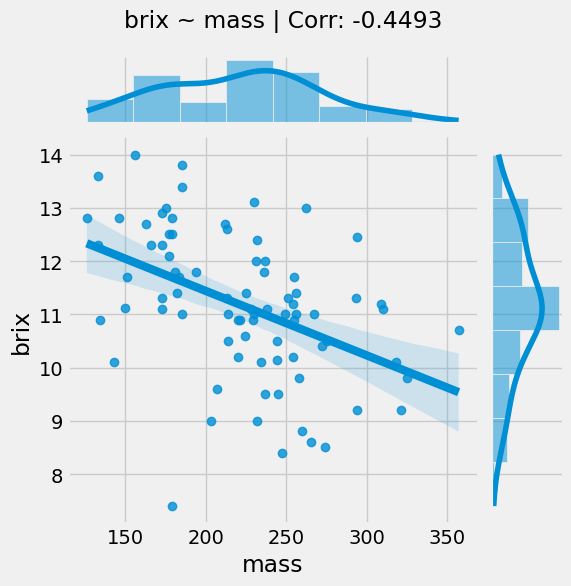

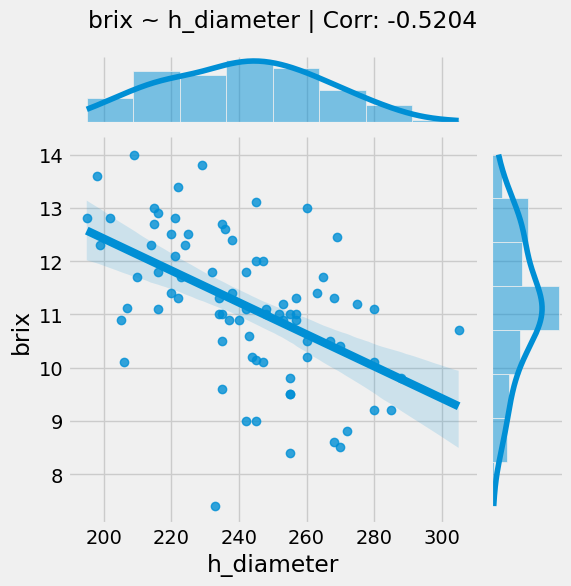

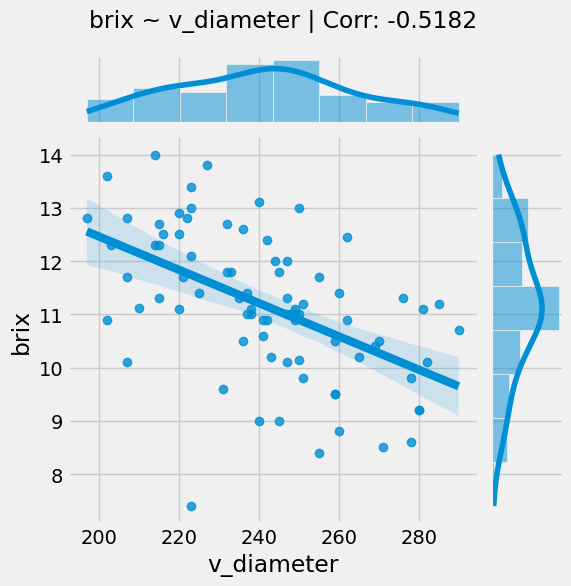

In [ ]:
for i in range(3):
    corr = model_dataset.iloc[:, i].corr(model_dataset["brix"]).round(4)
    title = f"brix ~ {model_dataset.columns[i]} | Corr: {corr}"
    p = sns.jointplot(
        x=model_dataset.columns[i], y="brix", data=model_dataset, kind="reg"
    )
    p.figure.suptitle(title)
    p.figure.subplots_adjust(top=0.9)

### brix ~ <each_qualitative_predictor>

#### p_value of brix ~ type is extremely small => It has Statistical significance

### Linear regression models

In [ ]:
model_dataset.columns

Index(['mass', 'h_diameter', 'v_diameter', 'type', 'brix', 'A', 'B', 'C'], dtype='object')

In [ ]:
model_dataset

,mass,h_diameter,v_diameter,type,brix,A,B,C
0,255,257,262,A,10.9,True,False,False
1,325,288,278,A,9.8,True,False,False
2,185,235,237,A,11.0,True,False,False
3,203,245,245,A,9.0,True,False,False
4,229,253,249,A,10.9,True,False,False
...,...,...,...,...,...,...,...,...
76,177,225,216,C,12.5,False,False,True
77,173,216,220,C,11.1,False,False,True
78,126,195,197,C,12.8,False,False,True
79,181,216,232,C,11.8,False,False,True


In [ ]:
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from typing import Optional, Callable


def summary_linear_model(x: list, y, dataset, transformer: Optional[Callable] = None):
    x_ = sm.add_constant(dataset[x])
    y_ = dataset[y]
    results = sm.OLS(y_, x_).fit()
    Intercept = results.params.iloc[0]
    Slope = results.params.iloc[1:]
    P_values = results.pvalues[1:]
    R_squared = results.rsquared
    MSE = mean_squared_error(y_, results.predict())
    print("Intercept\n", Intercept, end="\n\n")
    print("Slope\n", Slope, end="\n\n")
    print("P_values\n", P_values, end="\n\n")
    print("R_squared\n", R_squared, end="\n\n")
    print("MSE\n", MSE, end="\n\n")
    return {
        "Intercept": Intercept,
        "Slope": Slope,
        "P_values": P_values,
        "R_squared": R_squared,
        "MSE": MSE,
    }

#### Model 2: $ brix \sim \beta_0 + \beta_1* $ h.diameter

In [ ]:
summary_linear_model(x=["h_diameter"], y="brix", dataset=model_dataset)

Intercept
 18.418720892318326

Slope
 h_diameter   -0.029984
dtype: float64

P_values
 h_diameter    6.358985e-07
dtype: float64

R_squared
 0.27084372901518006

MSE
 1.3372956059165197



{'Intercept': 18.418720892318326,
 'Slope': h_diameter   -0.029984
 dtype: float64,
 'P_values': h_diameter    6.358985e-07
 dtype: float64,
 'R_squared': 0.27084372901518006,
 'MSE': 1.3372956059165197}

#### Model 3: $ brix \sim \beta_0 + \beta_1* $ v.diameter

In [ ]:
summary_linear_model(x=["v_diameter"], y="brix", dataset=model_dataset)

Intercept
 18.715610674461818

Slope
 v_diameter   -0.031266
dtype: float64

P_values
 v_diameter    7.214880e-07
dtype: float64

R_squared
 0.2685804964678722

MSE
 1.3414464458134245



{'Intercept': 18.715610674461818,
 'Slope': v_diameter   -0.031266
 dtype: float64,
 'P_values': v_diameter    7.214880e-07
 dtype: float64,
 'R_squared': 0.2685804964678722,
 'MSE': 1.3414464458134245}

#### Model 4: $ brix \sim \beta_0 + \beta_1* $ mass

In [ ]:
summary_linear_model(x=["mass"], y="brix", dataset=model_dataset)

Intercept
 13.858654422770515

Slope
 mass   -0.012104
dtype: float64

P_values
 mass    0.000026
dtype: float64

R_squared
 0.2018480867962441

MSE
 1.463835790563293



{'Intercept': 13.858654422770515,
 'Slope': mass   -0.012104
 dtype: float64,
 'P_values': mass    0.000026
 dtype: float64,
 'R_squared': 0.2018480867962441,
 'MSE': 1.463835790563293}

#### Model 5: brix $ \sim \beta_0 $ + $ \beta_1 $ * type_a + $ \beta_2 $ * type_b + $ \beta_3 $ * type_c + $ \beta_4 $ * h.diameter + $ \beta_5 $ * v.diameter + $ \beta_6 $ * mass

In [ ]:
model_no_scale = summary_linear_model(
    x=["A", "B", "C", "h_diameter", "v_diameter", "mass"],
    y="brix",
    dataset=model_dataset.drop(columns="type").astype("float"),
)
model_no_scale

Intercept
 22.96060824796631

Slope
 A             7.436309
B             7.268284
C             8.256016
h_diameter   -0.077715
v_diameter   -0.049572
mass          0.051018
dtype: float64

P_values
 A             0.002530
B             0.000253
C             0.000005
h_diameter    0.023481
v_diameter    0.139576
mass          0.006148
dtype: float64

R_squared
 0.4327761590140806

MSE
 1.0403064203192633



{'Intercept': 22.96060824796631,
 'Slope': A             7.436309
 B             7.268284
 C             8.256016
 h_diameter   -0.077715
 v_diameter   -0.049572
 mass          0.051018
 dtype: float64,
 'P_values': A             0.002530
 B             0.000253
 C             0.000005
 h_diameter    0.023481
 v_diameter    0.139576
 mass          0.006148
 dtype: float64,
 'R_squared': 0.4327761590140806,
 'MSE': 1.0403064203192633}

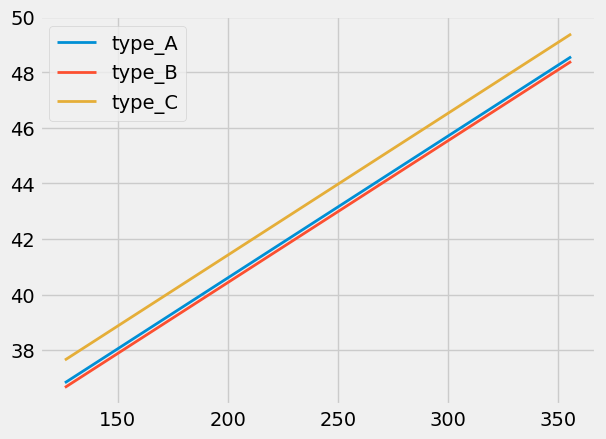

In [ ]:
intercept_a = model_no_scale["Slope"]["A"] + model_no_scale["Intercept"]
intercept_b = model_no_scale["Slope"]["B"] + model_no_scale["Intercept"]
intercept_c = model_no_scale["Slope"]["C"] + model_no_scale["Intercept"]

x = np.arange(model_dataset["mass"].min(), model_dataset["mass"].max())
ya = x * model_no_scale["Slope"]["mass"] + intercept_a
yb = x * model_no_scale["Slope"]["mass"] + intercept_b
yc = x * model_no_scale["Slope"]["mass"] + intercept_c
plt.plot(x, ya, linewidth=2, label="type_A")
plt.plot(x, yb, linewidth=2, label="type_B")
plt.plot(x, yc, linewidth=2, label="type_C")
plt.legend()

#### => Keep "type" predictor variable since typeC is significantly different from others.

## Scale data

In [ ]:
model_dataset.sample(10)

,mass,h_diameter,v_diameter,type,brix,A,B,C
49,224,243,241,B,10.6,False,True,False
41,213,236,236,B,12.6,False,True,False
63,179,220,220,C,12.5,False,False,True
68,163,215,215,C,12.7,False,False,True
61,173,222,215,C,11.3,False,False,True
9,275,267,270,A,10.5,True,False,False
17,237,255,259,A,9.5,True,False,False
70,183,223,221,C,11.7,False,False,True
44,251,257,247,B,11.3,False,True,False
45,225,238,237,B,11.4,False,True,False


In [ ]:
model_no_scale

{'Intercept': 22.96060824796631,
 'Slope': A             7.436309
 B             7.268284
 C             8.256016
 h_diameter   -0.077715
 v_diameter   -0.049572
 mass          0.051018
 dtype: float64,
 'P_values': A             0.002530
 B             0.000253
 C             0.000005
 h_diameter    0.023481
 v_diameter    0.139576
 mass          0.006148
 dtype: float64,
 'R_squared': 0.4327761590140806,
 'MSE': 1.0403064203192633}

### Data preparation

In [ ]:
from sklearn.preprocessing import (
    MaxAbsScaler,
    MinMaxScaler,
    Normalizer,
    RobustScaler,
    StandardScaler,
)

categorical_columns = ["A", "B", "C"]  # qualitative columns
numeric_columns = ["mass", "h_diameter", "v_diameter", "brix"]  # quantitative columns

model_dataset_scale = dict()
all_models = dict()


def get_model_with_scaler(
    scaler,
    categorical_predictor: list,
    numeric_predictor: list,
    response: str,
    dataset: pd.DataFrame,
):
    if not scaler:
        raise Exception("Scaler must not be None")

    # Scale only numeric / quantitative data
    dataset_scale = pd.DataFrame(
        scaler().fit_transform(dataset[numeric_predictor]),
        columns=numeric_predictor,
    )

    dataset_scale[categorical_predictor] = dataset[categorical_predictor]

    predictors = []
    predictors.extend(categorical_predictor)
    predictors.extend(numeric_predictor)
    predictors.remove(response)

    model = summary_linear_model(
        x=predictors,
        y=response,
        dataset=dataset_scale.astype("float"),
    )
    return (dataset_scale, model)

### No scale

In [ ]:
model_dataset_scale["NoScale"] = model_dataset
all_models["NoScale"] = model_no_scale

### MaxAbsScaler

In [ ]:
scaler = MaxAbsScaler

scaler_name = scaler.__name__
model_dataset_scale[scaler_name], all_models[scaler_name] = get_model_with_scaler(
    scaler, categorical_columns, numeric_columns, "brix", model_dataset
)

Intercept
 1.6400434462831746

Slope
 A             0.531165
B             0.519163
C             0.589715
mass          1.300950
h_diameter   -1.693076
v_diameter   -1.026854
dtype: float64

P_values
 A             0.002530
B             0.000253
C             0.000005
mass          0.006148
h_diameter    0.023481
v_diameter    0.139576
dtype: float64

R_squared
 0.4327761590140802

MSE
 0.00530768581795543



### MinMaxScaler

In [ ]:
scaler = MinMaxScaler

scaler_name = scaler.__name__
model_dataset_scale[scaler_name], all_models[scaler_name] = get_model_with_scaler(
    scaler, categorical_columns, numeric_columns, "brix", model_dataset
)

Intercept
 0.5366149748780342

Slope
 A             0.145958
B             0.120500
C             0.270157
mass          1.785618
h_diameter   -1.295249
v_diameter   -0.698518
dtype: float64

P_values
 A             1.199238e-01
B             6.118287e-04
C             5.802507e-09
mass          6.147635e-03
h_diameter    2.348138e-02
v_diameter    1.395762e-01
dtype: float64

R_squared
 0.4327761590140806

MSE
 0.023882149226796684



### Normalizer

In [ ]:
scaler = Normalizer

scaler_name = scaler.__name__
model_dataset_scale[scaler_name], all_models[scaler_name] = get_model_with_scaler(
    scaler, categorical_columns, numeric_columns, "brix", model_dataset
)

Intercept
 0.12723136463856188

Slope
 A             0.038144
B             0.042073
C             0.047014
mass         -0.105182
h_diameter   -0.100230
v_diameter   -0.042769
dtype: float64

P_values
 A             0.308476
B             0.263948
C             0.206295
mass          0.198043
h_diameter    0.296304
v_diameter    0.633805
dtype: float64

R_squared
 0.7980395443337588

MSE
 7.835483284268177e-06



### RobustScaler

In [ ]:
scaler = RobustScaler

scaler_name = scaler.__name__
model_dataset_scale[scaler_name], all_models[scaler_name] = get_model_with_scaler(
    scaler, categorical_columns, numeric_columns, "brix", model_dataset
)

Intercept
 0.13525905442111522

Slope
 A            -0.069244
B            -0.157678
C             0.362181
mass          2.040706
h_diameter   -1.431591
v_diameter   -0.834901
dtype: float64

P_values
 A             0.781555
B             0.108590
C             0.090499
mass          0.006148
h_diameter    0.023481
v_diameter    0.139576
dtype: float64

R_squared
 0.4327761590140804

MSE
 0.288173523634145



### StandardScaler

In [ ]:
scaler = StandardScaler

scaler_name = scaler.__name__
model_dataset_scale[scaler_name], all_models[scaler_name] = get_model_with_scaler(
    scaler, categorical_columns, numeric_columns, "brix", model_dataset
)

Intercept
 0.014655289221765476

Slope
 A            -0.155518
B            -0.279589
C             0.449761
mass          1.893727
h_diameter   -1.348884
v_diameter   -0.821676
dtype: float64

P_values
 A             0.647366
B             0.054860
C             0.142770
mass          0.006148
h_diameter    0.023481
v_diameter    0.139576
dtype: float64

R_squared
 0.4327761590140804

MSE
 0.5672238409859197



## Test models

### Leave one out cross validation

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

df = pd.DataFrame(
    {
        "y": [6, 8, 12, 14, 14, 15, 17, 22, 24, 23],
        "x1": [2, 5, 4, 3, 4, 6, 7, 5, 8, 9],
        "x2": [14, 12, 12, 13, 7, 8, 7, 4, 6, 5],
    }
)

# define predictor and response variables
X = df[["x1", "x2"]]
y = df["y"]

# define cross-validation method to use
cv = LeaveOneOut()

# build multiple linear regression model
model = LinearRegression()

model.fit(X, y).coef_
# # use LOOCV to evaluate model
# scores = cross_val_score(
#     model, X, y, scoring="neg_mean_absolute_error", cv=cv, n_jobs=-1
# )

# # view mean absolute error
# np.mean(np.absolute(scores))

array([ 0.78026214, -1.12528913])